In [91]:
from SpinTrain import *
import numpy as nup
import matplotlib.pyplot as plt


In [87]:
ca = CommutatorAlgebra()

ca['S+_a', 'S-_a'] = Term([2, 'Sz_a'])
ca['Sz_a', 'S+_a'] = Term(['S+_a'])
ca['Sz_a', 'S-_a'] = Term([-1,'S-_a'])
# by default assumes all objects are scalars

In [145]:
ca = CommutatorAlgebra()

def define_comms(site):
    plus  = 'S^+_{%s}' % site
    minus = 'S^-_{%s}' % site
    z     = 'S^z_{%s}' % site

    ca[plus, minus] = Term([2, z])
    ca[z, plus]  = Term([+1, plus])
    ca[z, minus] = Term([-1, minus])
    
bond_zetas = [r'\zeta_1', r'\zeta_2', r'\zeta_3']
bond_zetabs = [r'\zeta^*_1', r'\zeta^*_2', r'\zeta^*_3']

WA = [1,2,3,4,5,6]
WB = [1,2,3,4,5,6]

WAb = [1,2,3,4,5,6]
WBb = [1,2,3,4,5,6]

# assigns A bonds to (h0h1), (h2h3), (h4h5)

for i in range(6):
    h = 'h%d' % i
    v = 'v%d' % i
    n = 'n%d' % i
    
    hpp = 'h%d' % ((i+1)%6)
    
    hp = 'h%d' % ((i-1)%6)
    vp = 'v%d' % ((i-1)%6)
    np = 'n%d' % ((i-1)%6)
    
    define_comms(h)
    define_comms(v)
    define_comms(n)
    

    
    
    w1 = Expression([bond_zetas[i%3], 'S^z_{%s}' % hpp],
                    [bond_zetas[(i+1)%3], 'S^z_{%s}' % n],
                    [bond_zetas[(i-1)%3], 'S^z_{%s}' % v])
    w2 = Expression([bond_zetas[(i-1)%3], 'S^z_{%s}' % hp],
                    [bond_zetas[(i+1)%3], 'S^z_{%s}' % np],
                    [bond_zetas[i%3], 'S^z_{%s}' % vp])
    w1b = Expression([bond_zetabs[i%3], 'S^z_{%s}' % hpp],
                    [bond_zetabs[(i+1)%3], 'S^z_{%s}' % n],
                    [bond_zetabs[(i-1)%3], 'S^z_{%s}' % v])
    w2b = Expression([bond_zetabs[(i-1)%3], 'S^z_{%s}' % hp],
                    [bond_zetabs[(i+1)%3], 'S^z_{%s}' % np],
                    [bond_zetabs[i%3], 'S^z_{%s}' % vp])
    
    if i %2 == 0:
        WA[i], WB[i] = w1, w2
    else:
        WA[i], WB[i] = w2, w1

def tostar(x):
    res = x.copy()
    for i in range(1,4):
        s = r'\zeta_%d' % i
        sb = r'\zeta^*_%d' % i
        res = res.substitute(s, Expression(sb))
    return res
        
# calculate the complex conjugate
for i in range(6):
    WAb[i] = tostar(WA[i])
    WBb[i] = tostar(WB[i])

    

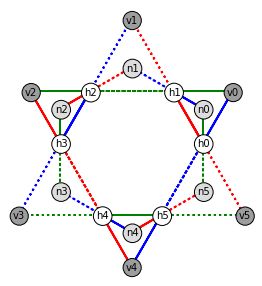

In [277]:


# make sure it didn't get cooked
rB = 1.4
rA = 1

b1 = rB*nup.array([1,0])
b2 = rB*nup.array([1/2,nup.sqrt(3)/2])

a1 = rA*nup.array([1,0])
a2 = rA*nup.array([1/2,nup.sqrt(3)/2])

c1 = (2/3)*(a2-0.5*a1)
c2 = (2/3)*(a1-0.5*a2)

h=nup.array([nup.array([0,0]), a2-a1, a2-a1-b1, -a1-b1, -a1-b2, -b2])
n=nup.array([c1*rA, a2-a1-c2*rB,c1*rA-a1-b1,-c1*rB-a1-b1,-b2-a1+c2*rA,-c1*rB])
v=nup.array([a2, -a1+a2+b2-b1, a2-2*a1-b1, -b2-a1-b1, -b2-a2,b1-b2])

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(*(h.T),'ko')
ax.plot(*(n.T),'ko')
ax.plot(*(v.T),'ko')
ax.set_aspect('equal','box')

colors = {r'\zeta_1': 'r', r'\zeta_2': 'g', r'\zeta_3': 'b'}
points = {'h': h, 'v': v, 'n': n}

def arrow(f, i, **kwargs):
    dx = f-i
    ax.arrow(i[0],i[1],dx[0],dx[1],length_includes_head=True,head_width=0,**kwargs)

    
def plot_Z(i):
    for t in WA[i].terms:
        idx = t.ops[1][-3]
        num = int(t.ops[1][-2])
        arrow(h[i],points[idx][num],lw=2,color=colors[t.ops[0]])
        
    for t in WB[i].terms:
        idx = t.ops[1][-3]
        num = int(t.ops[1][-2])
        arrow(h[i],points[idx][num],ls=':',lw=2,color=colors[t.ops[0]])
    
# for i in [0,2,4]:
#     plot_Z(i)
    
for i in range(6):
    plot_Z(i)


dxy = nup.array([-0.09,-0.07])   

boxdict = {'boxstyle':'Circle','facecolor':'white','edgecolor':'black'}

for i in range(6):
    ax.text(*(h[i]+dxy),'h'+str(i), bbox={'boxstyle':'Circle','facecolor':'white','edgecolor':'black'})
    ax.text(*(n[i]+dxy),'n'+str(i), bbox={'boxstyle':'Circle','facecolor':'#dddddd','edgecolor':'black'})
    ax.text(*(v[i]+dxy),'v'+str(i), bbox={'boxstyle':'Circle','facecolor':'#9d9d9d','edgecolor':'black'})

# ax.set_xticks([])
# ax.set_yticks([])
# for s in ax.spines:
#     ax.spines[s].set_visible('False')
plt.axis('off')
    
fig.savefig('./hexagon.pdf')

# Conclusion: No double counting, and conectivity is correct
    

In [216]:
Z    = [0,0,0,0,0,0]
Zbar = [0,0,0,0,0,0]

# construct a "real" Z

for i in range(6):
    Z[i] =  Term(['K_A'])*WA[i]+Term(['K_B'])*WB[i]
    Zbar[i] =  Term(['K_A'])*WAb[i]+Term(['K_B'])*WBb[i]
    
for k in range(6):
    print(k)
    Z[k].show()
    Zbar[k].show()

0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

1


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

2


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

3


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

4


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

5


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [274]:
# Construct the new commutator algebra
# [Za, S_*^\pm] = ...
# allows us to later work with the Z_a only
cb = CommutatorAlgebra()

# enfoce canonical order
def simplifyHere(x):
    for i in range(6):
        ca.move_left(x, 'S^z_{n%s}' % i)
        ca.move_left(x, 'S^z_{v%s}' % i)
        ca.move_left(x, 'S^z_{h%s}' % i)

    ca.move_left(x, 'K_A')
    ca.move_left(x, 'K_B')
    ca.move_left(x, '\\zeta_1')
    ca.move_left(x, '\\zeta_2')
    ca.move_left(x, '\\zeta_3')

    x.collect()

for j in range(6):
    for spinstr in ['S^+_{h%d}' % ((j-1)%6), 'S^-_{h%d}' % ((j-1)%6),
                    'S^+_{h%d}' % ((j+1)%6), 'S^-_{h%d}' % ((j+1)%6)]:
#     for spinstr in ['S^+_{h%d}' % ((j)%6), 'S^-_{h%d}' % ((j)%6)]:
    
        S = Term([spinstr])

        x1 = S*Z[j] + (-Z[j]*S)
        x2 = S*Zbar[j] + (-Zbar[j]*S)

        ca.move_right(x1, spinstr)
        simplifyHere(x1)
        ca.move_right(x2, spinstr)
        simplifyHere(x2)

        cb[spinstr, 'Z_{h%d}' % j] = x1
        cb[spinstr, 'Z^*_{h%d}' % j] = x2


In [276]:
# simplifiers

def separateScalars(x):
    ca.move_left(x, '\\zeta_1')
    ca.move_left(x, '\\zeta_2')
    ca.move_left(x, '\\zeta_3')
    ca.move_left(x, '\\zeta^*_1')
    ca.move_left(x, '\\zeta^*_2')
    ca.move_left(x, '\\zeta^*_3')
    ca.move_left(x, 'K_A')
    ca.move_left(x, 'K_B')
    ca.move_left(x, 'J^2_{\perp A}')
    ca.move_left(x, 'J^2_{\perp B}')
    ca.move_left(x, 'U_{1A}')
    ca.move_left(x, 'U_{2A}')
    ca.move_left(x, 'U_{3A}')
    ca.move_left(x, 'U_{1B}')
    ca.move_left(x, 'U_{2B}')
    ca.move_left(x, 'U_{3B}')

def rightyHops(x):
    for l in range(6):
        cb.move_right(x, 'S^+_{h%d}'%l)
        cb.move_right(x, 'S^-_{h%d}'%l)
    
def leftyZ(x):
    for l in range(6):
        cb.move_left(Hring, 'Z_{h%d}'%l)
        cb.move_left(Hring, 'Z^*_{h%d}'%l)
    

In [219]:
cwring = []
ccwring = []
opring = []
# build all of the rings    
for i in range(6):
    h0 = 'h%d' % i
    h1 = 'h%d' % ((i+1)%6)
    h2 = 'h%d' % ((i+2)%6)
    h3 = 'h%d' % ((i+3)%6)
    h4 = 'h%d' % ((i+4)%6)
    h5 = 'h%d' % ((i+5)%6)

    # NN K terms, ccw
    F = Expression(['S^-_{%s}' % h0, 'S^+_{%s}' % h1])
    E = Expression(['S^-_{%s}' % h2, 'S^+_{%s}' % h3])
    f = Term('Z^*_{%s}'% h4)*Expression(['S^-_{%s}' % h4])
    e = Term('Z_{%s}'% h5)*Expression(['S^+_{%s}' % h5])


    Hring = Expression()
    
    JA2 = Term(['J^2_{\perp A}'])
    JB2 = Term(['J^2_{\perp B}'])
    
    if i%2==0:
        # A-hops
        Hring += Term('U_{1A}')*(f*F*E*e + e*E*F*f) 
        Hring += Term('U_{2A}')*(e*f*E*F + f*e*E*F + E*F*e*f + E*F*f*e)
        Hring += Term('U_{3A}')*(E*f*e*F + F*e*f*E)
        Hring =  JA2*Hring
        
        
    else:
        Hring += Term('U_{1B}')*(f*F*E*e + e*E*F*f) 
        Hring += Term('U_{2B}')*(e*f*E*F + f*e*E*F + E*F*e*f + E*F*f*e)
        Hring += Term('U_{3B}')*(E*f*e*F + F*e*f*E)
        Hring =  JB2*Hring
    
    separateScalars(Hring)    
    rightyHops(Hring)
    leftyZ(Hring)
    separateScalars(Hring)    
    Hring.collect()
    ccwring.append(Hring)
    
    # NN K terms, cw
    F = Expression(['S^+_{%s}' % h0, 'S^-_{%s}' % h1])
    E = Expression(['S^+_{%s}' % h2, 'S^-_{%s}' % h3])
    f = Term('Z_{%s}'% h4)*Expression(['S^+_{%s}' % h4])
    e = Term('Z^*_{%s}'% h5)*Expression(['S^-_{%s}' % h5])

    # calculate all the different contributions from the different energy sectors

    Hring = Expression()
    if i%2==0:
        # A-hops
        Hring += Term('U_{1A}')*(f*F*E*e + e*E*F*f) 
        Hring += Term('U_{2A}')*(e*f*E*F + f*e*E*F + E*F*e*f + E*F*f*e)
        Hring += Term('U_{3A}')*(E*f*e*F + F*e*f*E)
        Hring =  JA2*Hring
    else:
        Hring += Term('U_{1B}')*(f*F*E*e + e*E*F*f) 
        Hring += Term('U_{2B}')*(e*f*E*F + f*e*E*F + E*F*e*f + E*F*f*e)
        Hring += Term('U_{3B}')*(E*f*e*F + F*e*f*E)
        Hring =  JB2*Hring

    separateScalars(Hring)    
    rightyHops(Hring)
    leftyZ(Hring)
    separateScalars(Hring)    
    Hring.collect()
    cwring.append(Hring)
    
    # NNN K terms
    Hring = Expression()
    #AAAAH NONE OF THESE COMMUTE!
    
    opring.append(Hring)
    

/Users/alaricsanders/Box Sync/PhD/SpinTrain/SpinTrain.py:474: UserWarning: Symbol "J^2_{\perp A}" is not in the commutator database, assuming scalar...
  warn(s)
/Users/alaricsanders/Box Sync/PhD/SpinTrain/SpinTrain.py:474: UserWarning: Symbol "U_{1A}" is not in the commutator database, assuming scalar...
  warn(s)
/Users/alaricsanders/Box Sync/PhD/SpinTrain/SpinTrain.py:474: UserWarning: Symbol "U_{2A}" is not in the commutator database, assuming scalar...
  warn(s)
/Users/alaricsanders/Box Sync/PhD/SpinTrain/SpinTrain.py:474: UserWarning: Symbol "U_{3A}" is not in the commutator database, assuming scalar...
  warn(s)
/Users/alaricsanders/Box Sync/PhD/SpinTrain/SpinTrain.py:474: UserWarning: Symbol "\zeta^*_1" is not in the commutator database, assuming scalar...
  warn(s)
/Users/alaricsanders/Box Sync/PhD/SpinTrain/SpinTrain.py:474: UserWarning: Symbol "\zeta^*_2" is not in the commutator database, assuming scalar...
  warn(s)
/Users/alaricsanders/Box Sync/PhD/SpinTrain/SpinTrain.py:

In [222]:
grand = Expression()
for i in range(6):
    grand += cwring[i]+ccwring[i]

grand.collect()
grand.sort()

O = Term(grand.terms[0].ops[-6:])
r1 = grand.coefficient(O)
r1.show()

<IPython.core.display.Latex object>

In [224]:
# pull out exactly half od the full expression
# i.e. 

ring1 = cwring[0]+cwring[2]+cwring[4]+ccwring[1]+ccwring[3]+ccwring[5]
ring1 = ring1.copy()
separateScalars(ring1)
rightyHops(ring1)
ring1.collect()
ring1.sort()

rpre, O = ring1.factor(side='right')

# this shows that the coefficient of O has the form claimed above, i.e. the sum of 3 CW hops and 3 CCW hops
assert rpre == r1


In [225]:
for i in range(6):
    rpre = rpre.substitute('Z_{h%d}'%i, Expression(['K_A','W_{Ah%d}'%i], ['K_B','W_{Bh%d}'%i]))
    rpre = rpre.substitute('Z^*_{h%d}'%i, Expression(['K_A','W^*_{Ah%d}'%i], ['K_B','W^*_{Bh%d}'%i]))
rpre.drop('K_B')
separateScalars(rpre)
rpre.collect()
rpre.show()
O.show()
print(O)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

  +1 S^+_{h0} S^-_{h1} S^+_{h2} S^-_{h3} S^+_{h4} S^-_{h5}


In [226]:
def left_K(x):
    cb.move_left(x, 'K_B')
    cb.move_left(x, 'K_A')
    cb.move_left(x, 'K_B')
    cb.move_left(x, 'K_A')
    cb.move_left(x, 'J^2_{\perp A}')
    cb.move_left(x, 'J^2_{\perp B}')

left_K(rpre)
    
#pull out the scalars
rpre.show()

<IPython.core.display.Latex object>

In [231]:
for i in [1,2,3]:
    cb.move_left(ops,'U_{%dA}' % i)
    cb.move_left(ops,'U_{%dB}' % i)
    
# ops.show()
    
constB, x1 = ops.coefficient(Term('U_{1B}'),'right').factor()
constB, x2 = ops.coefficient(Term('U_{2B}'),'right').factor()
constB, x3 = ops.coefficient(Term('U_{3B}'),'right').factor()

constA, y1 = ops.coefficient(Term('U_{1A}'),'right').factor()
constA, y2 = ops.coefficient(Term('U_{2A}'),'right').factor()
constA, y3 = ops.coefficient(Term('U_{3A}'),'right').factor()


for op in [x1, x2, x3, y1, y2, y3]:
    op.sort('last')
    left_K(op)

print('Coefficient of ' + str(constA) + ' :')
print('U_{1A}*')
y1.show()
print('U_{2A}*')
y2.show()
print('U_{3A}*')
y3.show()    
print()

Coefficient of   +1 J^2_{\perp A} K_A K_A :
U_{1A}*


<IPython.core.display.Latex object>

U_{2A}*


<IPython.core.display.Latex object>

U_{3A}*


<IPython.core.display.Latex object>

In [229]:
# algebra help for the J_A coefficient

z = -Term(r'\zeta^*_1')*WA[0] + Term(r'\zeta_1')*WAb[1]
separateScalars(z)
z.show()
print(z)

zz = WAb[1]*WA[0]
separateScalars(zz)
zz.show()

<IPython.core.display.Latex object>

  -1 \zeta^*_1 \zeta_1 S^z_{h1}  -1 \zeta^*_1 \zeta_2 S^z_{n0}  -1 \zeta^*_1 \zeta_3 S^z_{v0}  +1 \zeta^*_1 \zeta_1 S^z_{h0}  +1 \zeta^*_3 \zeta_1 S^z_{n0}  +1 \zeta^*_2 \zeta_1 S^z_{v0}


<IPython.core.display.Latex object>

In [271]:
print('Coefficient of ' + str(constB) + ' :')
print('U_{1B}*')
x1.show()
print('U_{2B}*')
x2.show()
print('U_{3B}*')
x3.show()

Coefficient of   +1 J^2_{\perp B} K_A K_A :
U_{1B}*


<IPython.core.display.Latex object>

U_{2B}*


<IPython.core.display.Latex object>

U_{3B}*


<IPython.core.display.Latex object>

In [230]:
# algebra help for the J_B coefficient

z = -Term(r'\zeta^*_2')*WA[0] + Term(r'\zeta_3')*WAb[1]
separateScalars(z)
z.collect()
z.show()

<IPython.core.display.Latex object>

In [85]:
z = WA[2]*WAb[1] + WA[4]*WAb[3] + WA[0]*WAb[5]
separateScalars(z)
z = z.substitute(r'S^z_{h1}',Term('-1/2'))
z = z.substitute(r'S^z_{h3}',Term('-1/2'))
z = z.substitute(r'S^z_{h5}',Term('-1/2'))
z = z.substitute(r'S^z_{h0}',Term('1/2'))
z = z.substitute(r'S^z_{h2}',Term('1/2'))
z = z.substitute(r'S^z_{h4}',Term('1/2'))


z = z.substitute(r'S^z_{v0}',-Term(r'S^z_{n0}'))
z = z.substitute(r'S^z_{v2}',-Term(r'S^z_{n2}'))
z = z.substitute(r'S^z_{v4}',-Term(r'S^z_{n4}'))

z.sort('last')
z.collect()
z.show()
# print(z)

<IPython.core.display.Latex object>

In [ ]:
aa1 = x1.coefficient(Term(['K_A','K_A']),'right')
aa1.show()
aa2 = x2.coefficient(Term(['K_A','K_A']),'right')
aa2.show()
aa3 = x3.coefficient(Term(['K_A','K_A']),'right')
aa3.show()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
ab1 = x1.coefficient(Term(['K_A','K_B']),'right')
ab1.show()
ab2 = x2.coefficient(Term(['K_A','K_B']),'right')
ab2.show()
ab3 = x3.coefficient(Term(['K_A','K_B']),'right')
ab3.show()

In [ ]:
bb1 = x1.coefficient(Term(['K_B','K_B']),'right')
bb1.show()
bb2 = x2.coefficient(Term(['K_B','K_B']),'right')
bb2.show()
bb3 = x3.coefficient(Term(['K_B','K_B']),'right')
bb3.show()

# Look here: 

# constants4 = Term(['J^2_{\perp A}', 'K_A','K_A'])

# y = x.coefficient(constants4,'right')
# y.show()

# print(Expression('U_{1A}',[2,'U_{2A}'], 'U_{3A}')*Term(['J^2_{\perp A}', 'K_A','K_A'])*y == rpre)